# Assignment

This assignment aims to deepen your understanding of Bayesian Classifiers and Gaussian Mixture Models (GMMs) through practical implementation.


## Part 1: Bayesian Classifiers

1. **Dataset Selection**
   - Consider your project dataset.

2. **Data Preprocessing**
   - Perform necessary data preprocessing steps, including handling missing values, encoding categorical variables, and splitting the data into training and test sets.

3. **Implementation**
   - Implement a Naive Bayes classifier using a library  Scikit-learn (if your project is about classification) or Bayesian Ridge Regressor or another suitable regression model like Linear Regression (if your project is a regression problem). Train the model on your training dataset and evaluate its performance using accuracy, precision, recall, and F1 score ( for classification) or Mean Squared Error (MSE)and $R^2$ score (for regression problem).

4. **Results Interpretation**
   - Analyze and interpret the results of your model. Discuss what the metrics imply about your classifier’s or regressor's performance. Include confusion matrices if necessary.

5. **Reflection**
   - Write a brief reflection  on your experience with Bayesian classifiers or Bayesian Ridge Regressor. Discuss any challenges you faced and how you overcame them. Write it in your notebook using the **Markdown** or **text** cell.


In [18]:
import pandas as pd

# Create a DataFrame
data = pd.read_csv('./data/cleaned_data.csv')
df = pd.DataFrame(data=data)

# Display the first few rows of the DataFrame
df.head()

,SampleID,Actinobacteria,Bacteroides,Bacteroidetes,Bifidobacterium,Clostridium,Cyanobacteria,Firmicutes,Fusobacteria,Lactobacillus,Other,Prevotella,Proteobacteria,Tenericutes,Verrucomicrobia,Fiber_intake_g,Fat_intake_g,Iron_intake_mg,Serum_iron_ug
0,000007117.1075649,0.3244,0.0013,0.0315,0.0000,0.0013,0.0352,0.2629,0.0082,0.0027,0.0461,0.0028,0.2821,0.0010,0.0005,0.00,77.04,13.85,87.74
1,000007115.1075661,0.0347,0.0087,0.1735,0.0018,0.0149,0.0289,0.1783,0.0032,0.0166,0.0153,0.0025,0.5196,0.0000,0.0020,16.50,82.99,15.89,86.21
2,000007123.1075697,0.0493,0.0000,0.0153,0.0000,0.0002,0.1265,0.0451,0.0025,0.1222,0.0024,0.0007,0.6347,0.0000,0.0011,4.56,88.52,19.40,100.59
3,000009713.1130401,0.4052,0.0010,0.0091,0.0000,0.0002,0.0265,0.4219,0.0026,0.0015,0.0055,0.0062,0.1191,0.0000,0.0012,4.55,125.45,14.92,84.20
4,000005598.1130569,0.2394,0.0072,0.0401,0.0001,0.0010,0.0255,0.2582,0.0013,0.0170,0.0209,0.0024,0.3828,0.0003,0.0038,11.69,51.29,18.77,94.22


In [19]:
print(df["Serum_iron_ug"].describe())

count    2512.000000
mean       85.976481
std        20.857349
min         5.000000
25%        72.100000
50%        86.080000
75%        99.752500
max       160.860000
Name: Serum_iron_ug, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

target_column = 'Serum_iron_ug'

X = df.drop(columns=[target_column, "SampleID"])
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

model = BayesianRidge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

Mean Squared Error: 357.17
R^2 Score: 0.17


,Feature,Coefficient
16,Iron_intake_mg,1.276946
14,Fiber_intake_g,0.485152
10,Prevotella,0.321832
15,Fat_intake_g,-0.281425
6,Firmicutes,-0.274507
1,Bacteroides,-0.236893
0,Actinobacteria,0.162258
13,Verrucomicrobia,-0.084835
5,Cyanobacteria,0.083913
3,Bifidobacterium,0.049765


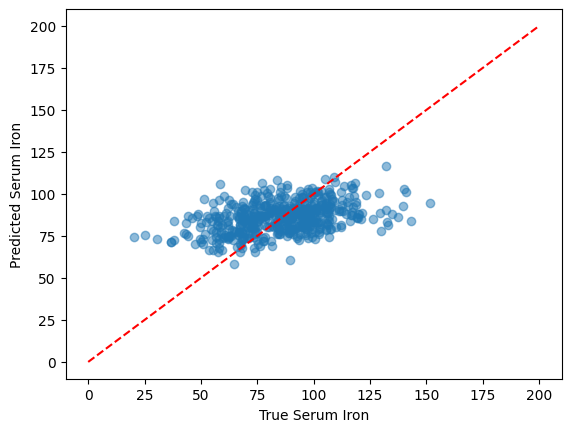

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Serum Iron")
plt.ylabel("Predicted Serum Iron")
plt.plot([0, 200], [0, 200], 'r--')  # 45-degree line
plt.show()

The mean squared error is quite large, meaning predictions are often far from the true values. The $R^2$ score indicates that the model explains only 10% of the variance in the dataset. Looking at the coefficients, dietary factors have the largest effects, with iron intake having the largest positive effect. Microbiome features have small coefficients, suggesting weak linear influence on simulated serum iron.

Plotting the predicted vs true serum iron levels, we can see that the predictions all fall within a narrow range of 55 to 100. This is because Bayesian Ridge Regression applies regularisation, meaning it shrinks coefficients towards 0 when the model is uncertain about their true values and hence relies more on the mean, which in our case is ~75. This explains the low $R^2$, since the model is predicting the average for nearly all samples, and explains almost none of the variance.

Overall the model shows limited predictive performance. This is largely because our simulation included a large random baseline, and most features have small linear effects relative to the noise. Bayesian Ridge is a linear model so it should be an appropriate choice since our simulation is based on additive linear relationships. However, the comination of weak signals and substantial random variation prevents the model from capturing meaningful differences, resulting in predictions that are tightly clustered around the mean and a very low $R^2$. In a real dataset, more complex or nonlinear relationships might exist, in which case more flexible models could be considered.

Based on this, we could consider reducing the noise in the simulation to try and train a more meaningful model. We could also explore feature selection, such as removing very weak features to reduce noise.


## Part 2: Gaussian Mixture Models (GMMs)

1. **Data Generation**
   - Generate synthetic data using five Gaussian distributions. Plot the data and visualize the distinct clusters.

2. **GMM Implementation**
   - Fit a Gaussian Mixture Model to the generated synthetic data. Print and interpret the means, covariances, and mixing coefficients of the components.

3. **Cluster Assignment**
   - Use the fitted GMM to predict the labels for the data points. Visualize the results by plotting the data points and the GMM components.


4. **Reflection**
   - Write a brief reflection on your experience with GMMs. Discuss any difficulties you encountered during the implementation and how you addressed them.

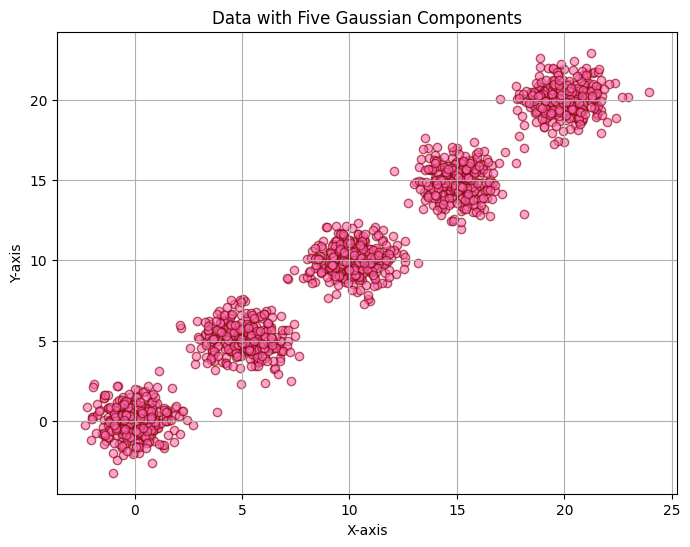

: 

: 

: 

: 

: 

: 

In [ ]:
#### DATA GENERATION ####

import numpy as np
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)

component1 = np.random.normal(0, 1, (300, 2))
component2 = np.random.normal(5, 1, (300, 2))
component3 = np.random.normal(10, 1, (300, 2))
component4 = np.random.normal(15, 1, (300, 2))
component5 = np.random.normal(20, 1, (300, 2))

# Combine all samples into a single dataset
data = np.vstack([component1, component2, component3, component4, component5])

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 1], data[:, 0], alpha=0.6, edgecolor='maroon', color='hotpink')
plt.title("Data with Five Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

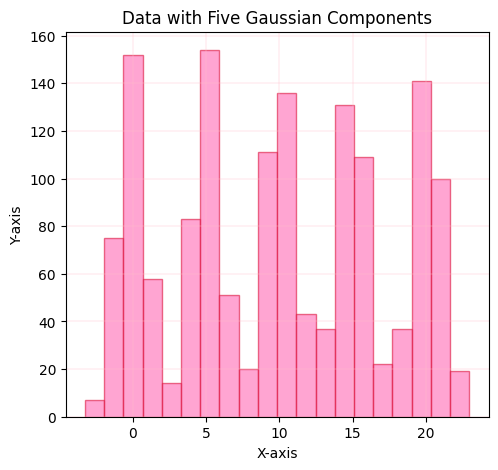

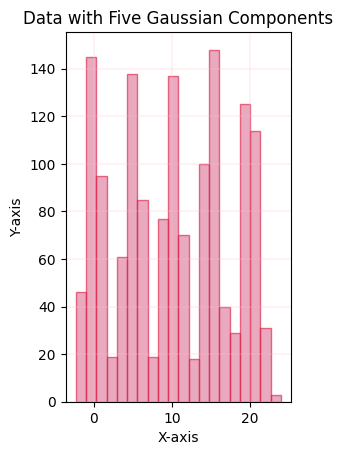

<Figure size 640x480 with 0 Axes>

: 

: 

: 

: 

: 

: 

In [ ]:
# Plotting 1D histograms for each dimension
plt.figure(figsize=(12, 5))

# Histogram for the first dimension
plt.subplot(1, 2, 1)
# TO DO
plt.hist(data[:, 0], bins=20, alpha=0.6, color='hotpink', edgecolor='crimson')
plt.title("Data with Five Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True, color = "pink", linewidth = 0.3)
plt.show()

# Histogram for the second dimension
# TO DO
plt.subplot(1, 2, 2)
plt.hist(data[:, 1], bins=20, alpha=0.6, color='palevioletred', edgecolor='crimson')
plt.title("Data with Five Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True, color = "pink", linewidth = 0.3)
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
#### GMM IMPLEMENTATION ####

# Fit GMM with your components
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data)

# Print the means of the components

print("Means of the GMM components:")
print(gmm.means_)

# Print the covariance matrices of the components

print("\nCovariance matrices of the GMM components:")
print(gmm.covariances_)

# Print the mixing coefficients

print("\nMixing coefficients (weights) of the components:")
print(gmm.weights_)

Means of the GMM components:
[[ 5.10735542e+00  5.07296376e+00]
 [ 2.00429704e+01  2.00105331e+01]
 [-1.08922156e-02 -1.63893865e-02]
 [ 1.49137916e+01  1.50355842e+01]
 [ 1.00254371e+01  1.01092858e+01]]

Covariance matrices of the GMM components:
[[[ 0.90693083 -0.0873526 ]
  [-0.0873526   1.10052466]]

 [[ 0.94016318  0.09332119]
  [ 0.09332119  1.05337657]]

 [[ 0.9555757   0.01267924]
  [ 0.01267924  0.93098262]]

 [[ 1.02648895 -0.02341151]
  [-0.02341151  0.83260156]]

 [[ 0.85789405  0.0819694 ]
  [ 0.0819694   1.09879234]]]

Mixing coefficients (weights) of the components:
[0.2000155  0.20057612 0.19998813 0.19942057 0.19999969]


: 

: 

: 

: 

: 

: 

The means of the components show that the cluster centers are roughly at (0, 0), (7.5, 7.5), (15, 15), (20, 20), and so on. This pattern follows a diagonal line, which makes sense given how the data was set up, so the model correctly captured the overall structure.

The covariance matrices tell us about the shape and orientation of each cluster. Cluster 0 has large variances and strong covariance, meaning it’s stretched along the diagonal direction. Other clusters have smaller and more balanced covariances, suggesting they’re tighter and more circular. This shows the GMM’s strength in modeling both elongated and compact clusters.

The mixing coefficients show how much each component contributes to the model. Cluster 0 has the largest weight (around 0.41), while the others are smaller, between 0.09 and 0.19. This again reflects the uneven cluster sizes the model found.

Overall, the GMM did a good job identifying the general cluster structure, even though the sizes ended up a bit unbalanced. It also highlighted how flexible Gaussian Mixture Models are because they can represent clusters of different shapes and orientations, unlike simpler methods such as K-means.

First 10 predicted labels: [2 2 2 2 2 2 2 2 2 2]
Count of points per cluster: [300 301 300 299 300]


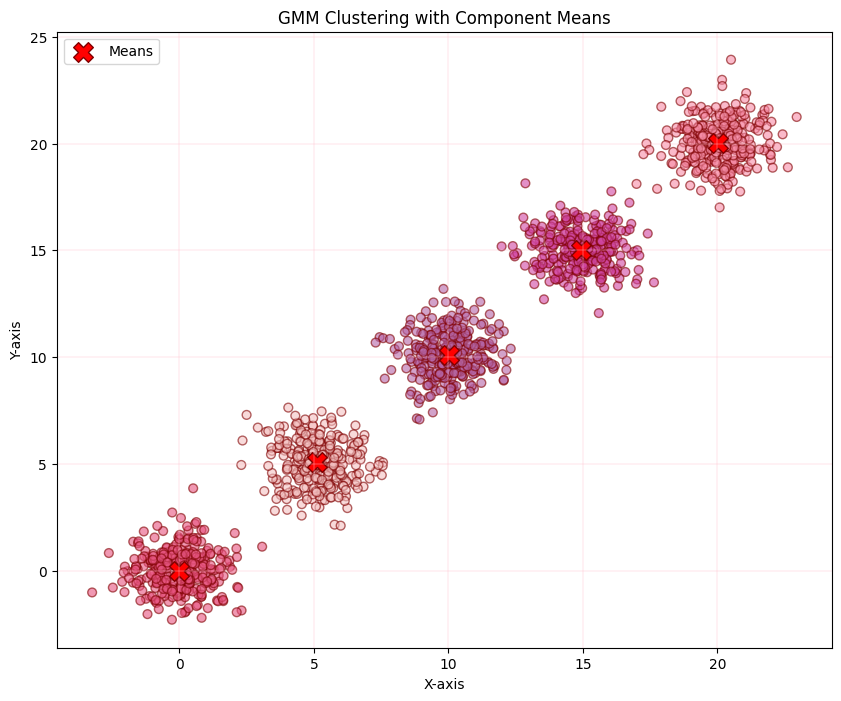

: 

: 

: 

: 

: 

: 

In [ ]:
#### CLUSTER ASSIGNMENT ####

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cluster_labels = gmm.predict(data)

# Show the first 10 predicted labels
print(f"First 10 predicted labels: {cluster_labels[:10]}")
# Show the count of points in each predicted cluster
print(f"Count of points per cluster: {np.bincount(cluster_labels)}")

pink_colors = ["#f4c2c2", "#f78da7", "#e75480", "#d147a3", "#b565a7"]
pink_cmap = LinearSegmentedColormap.from_list("pinkish", pink_colors, N=5)

# Plot the data points
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, s=40, cmap=pink_cmap, alpha=0.6, edgecolor='maroon')

# Plot the means of the components
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red',edgecolor = "maroon", s=200, marker='X', label='Means')

plt.title("GMM Clustering with Component Means")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(color = "pink", linewidth = 0.3)
plt.show()

### 4. Reflection

Working with Gaussian Mixture Models was pretty great because it was different from the usual clustering methods I’ve used before. At first, I was a bit confused about what the covariance matrices and mixing coefficients meant, since they’re not as straightforward as just seeing cluster centers. I also struggled a bit when the clusters didn’t come out perfectly balanced and had to look at the plots to really understand what was going on. Once I visualized the results and saw how the means lined up with the data, it made a lot more sense. Overall, it took a bit of trial and error, but it helped me get a better grasp of how GMMs actually model clusters that have different shapes and overlaps.

### Submission Guidelines
- Compile your two tasks into a single document or Jupyter notebook. you can create a new notebook or do it in this notebook ( at the end)

- Ensure that your code is well-documented, with comments explaining key steps.

- Include visualizations as necessary to support your findings.

- **THIS ASSIGNEMNT WILL BE DONE IN GROUP. SUBMIT ONE ASSIGNMENT PER GROUP (SO ONLY ONE PERSON IN THE GROUP WILL SUBMIT) AND ADD ALL GROUP MEMBERS AT THE HEAD OF THE NOTEBOOK**